In [1]:
%matplotlib inline
import os
import os.path as op
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

In [3]:
cpp = pd.read_csv('~/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/cpp2.csv')

In [4]:
diff_CPP_amplitude = cpp['low'].to_numpy()

In [6]:
model = pd.read_csv('~/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model1_comb.csv')

In [9]:
par_hc1 = model.filter(regex = "v_subj\(High.1.0\).*").to_numpy()[0]
par_hc2 = model.filter(regex = "v_subj\(High.0.0\).*").to_numpy()[0]
par_hc = (abs(par_hc1) - abs(par_hc2))/2
par_lc1 = model.filter(regex="v_subj\(Low.1.0\).*").to_numpy()[0]
par_lc2 = model.filter(regex="v_subj\(Low.0.0\).*").to_numpy()[0]
par_lc = (abs(par_lc1) - abs(par_lc2))/2
diff_v = (par_hc2 - par_lc2)/2

In [10]:
abs(diff_CPP_amplitude)

array([2.23117448e-08, 1.12834130e-06, 4.25048809e-06, 3.04887153e-06,
       1.70989851e-07, 4.65447953e-07, 6.20747163e-07, 2.95550387e-06,
       5.28875238e-06, 4.53711180e-07, 2.45905087e-06, 1.32462822e-06,
       5.20011125e-06, 1.84154538e-06])

In [14]:
abs(diff_v)

array([0.32101863, 0.94815921, 0.20418557, 0.83012881, 0.70920793,
       0.23600156, 0.33833942, 0.51436403, 0.67029637, 0.68816015,
       0.23352106, 0.63956856, 0.68381563, 0.68068645])

In [276]:
reg_independent_diff   = pd.DataFrame({'erp' : diff_CPP_amplitude})

In [277]:
y = diff_v
X = reg_independent_diff
X = sm.add_constant(X)

In [278]:
model_ddm_1 = sm.OLS(y, X).fit()

In [279]:
model_ddm_1.summary()

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.068
Method:                 Least Squares   F-statistic:                    0.1706
Date:                Wed, 04 May 2022   Prob (F-statistic):              0.687
Time:                        21:11:45   Log-Likelihood:                0.66727
No. Observations:                  14   AIC:                             2.665
Df Residuals:                      12   BIC:                             3.944
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5203      0.098     -5.322      0.000      -0.733      -0.307
erp        -1.478e+04   3.58e+04     -0.413      0.687   -9.28e+04    6.32e+04
==============================================================================
Omnibus:                        0.921   Durbin-Watson:                   2.836
Prob(Omnibus):                  0.631   Jarque-Bera (JB):                0.693
Skew:                           0.133   Prob(JB):                        0.707
Kurtosis:                       1.943   Cond. No.                     5.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.85e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

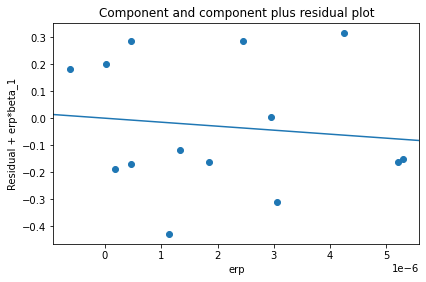

In [280]:
fig = sm.graphics.plot_ccpr(model_ddm_1, "erp")
fig.tight_layout(pad=1.0)

In [281]:
stats.pearsonr(diff_v, diff_CPP_amplitude)

(-0.11838326640511986, 0.6868935313031403)

In [282]:
pdata = pd.read_csv("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/filtered_group/sourcedata-eeg_outside-MRT/beh/performance_data.csv")

In [283]:
diff_data = pd.DataFrame({'ACC_high':[],
                          'ACC_low':[],
                          'RT_high':[],
                          'RT_low':[],
                          'diff_acc':[],
                          'diff_rt':[],
                          'Subject':[]})
for i in range(1,18):
    if i !=2 and i != 7 and i != 11:
        subject = i
        
        data_High = pdata[(pdata["Condition"]=="High/Yes")|(pdata["Condition"]=="High/No")&(pdata["Subject"]==i)]
        data_Low = pdata[(pdata["Condition"]=="Low/Yes")|(pdata["Condition"]=="Low/No")&(pdata["Subject"]==i)]
        
        data_High_rt = data_High['RT'].mean()
        data_Low_rt = data_Low['RT'].mean()
        data_diff_rt = data_High_rt - data_Low_rt
        
        data_High_acc = data_High['ACC'].mean()
        data_Low_acc = data_Low['ACC'].mean()
        data_diff_acc = data_High_acc - data_Low_acc
        
        data_new = pd.DataFrame({'ACC_high':[ data_High_acc],
                          'ACC_low':[data_Low_acc],
                          'RT_high':[data_High_rt],
                          'RT_low':[data_Low_rt],
                          'diff_acc':[data_diff_acc],
                          'diff_rt':[data_diff_rt],
                          'Subject':[i]})
        diff_data = diff_data.append(data_new)
diff_data['Subject'] = diff_data['Subject'].astype(int) 

In [284]:
diff_data.to_csv("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/filtered_group/sourcedata-eeg_outside-MRT/beh/diff_data.csv",index = False)

In [285]:
diff_acc = diff_data['diff_acc'].to_numpy()
diff_rt = diff_data['diff_rt'].to_numpy()

In [286]:
#response time regression response time 
y = diff_rt
X = reg_independent_diff
X = sm.add_constant(X)
# Note the difference in argument order
model_rt = sm.OLS(y, X).fit()
predictions = model_rt.predict(X) # make the predictions by the model
# Print out the statistics
model_rt.summary()

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.7480
Date:                Wed, 04 May 2022   Prob (F-statistic):              0.404
Time:                        21:11:48   Log-Likelihood:                -30.819
No. Observations:                  14   AIC:                             65.64
Df Residuals:                      12   BIC:                             66.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -83.8015      0.927    -90.435      0.000     -85.820     -81.782
erp         2.935e+05   3.39e+05      0.865      0.404   -4.46e+05    1.03e+06
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.475
Skew:                          -0.191   Prob(JB):                        0.789
Kurtosis:                       2.182   Cond. No.                     5.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.85e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

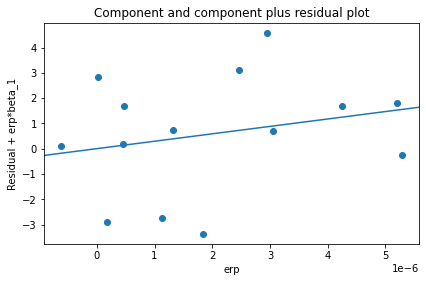

In [287]:
fig = sm.graphics.plot_ccpr(model_rt, "erp")
fig.tight_layout(pad=1.0)

In [288]:
stats.pearsonr(diff_rt, diff_CPP_amplitude)

(0.24222492207389623, 0.4040806482016715)

In [289]:
y = diff_acc
X = reg_independent_diff
X = sm.add_constant(X)
# Note the difference in argument order
model_per = sm.OLS(y, X).fit()
predictions = model_per.predict(X) # make the predictions by the model
# Print out the statistics
model_per.summary()

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.083
Method:                 Least Squares   F-statistic:                  0.003585
Date:                Wed, 04 May 2022   Prob (F-statistic):              0.953
Time:                        21:11:50   Log-Likelihood:                -3.8873
No. Observations:                  14   AIC:                             11.77
Df Residuals:                      12   BIC:                             13.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7586      0.135     64.711      0.000       8.464       9.054
erp        -2967.5681   4.96e+04     -0.060      0.953   -1.11e+05    1.05e+05
==============================================================================
Omnibus:                        0.779   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.743
Skew:                           0.397   Prob(JB):                        0.690
Kurtosis:                       2.198   Cond. No.                     5.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.85e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

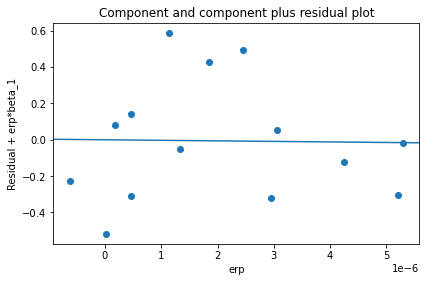

In [290]:
fig = sm.graphics.plot_ccpr(model_per, "erp")
fig.tight_layout(pad=1.0)

In [291]:
stats.pearsonr(diff_acc, diff_CPP_amplitude)

(-0.017282242230142672, 0.9532397104089229)

In [15]:
3.58e+04

35800.0